In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Impoting dataset
df=pd.read_csv('crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
#rename unnamed column
data=df.rename({'Unnamed: 0':'States'},axis=1)
data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Exploratory data analysis(EDA)

In [4]:
#To see the information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
#check any null values is there in dataset
data.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [7]:
data.duplicated().any()

False

In [8]:
data1=data.set_index('States')
data1.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


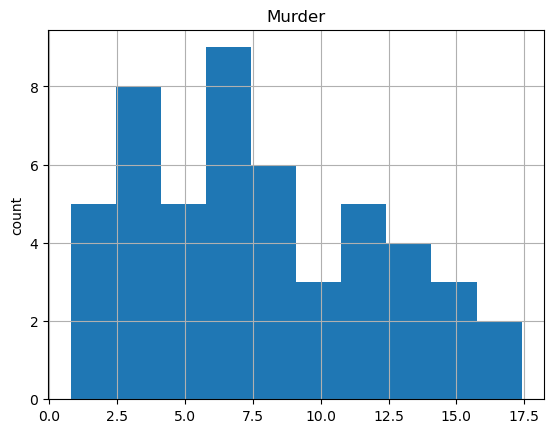

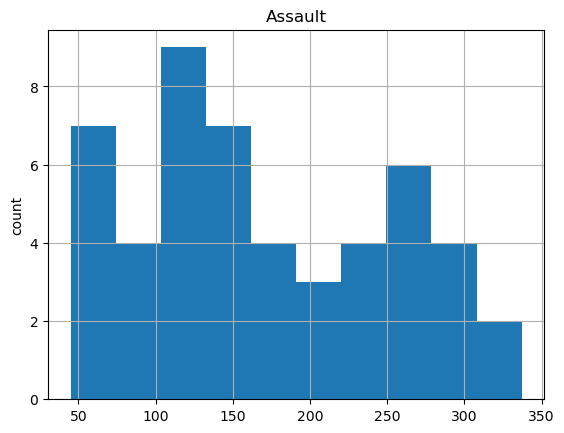

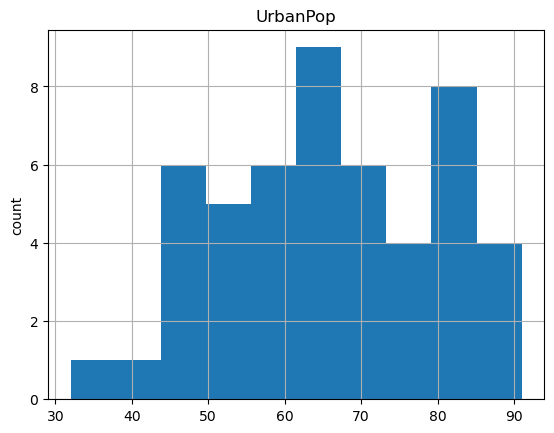

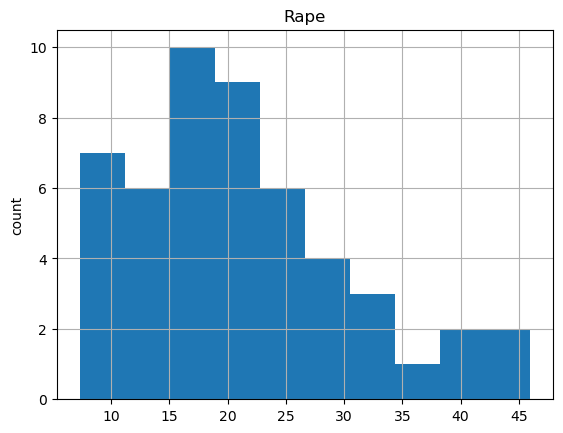

In [9]:
#plotting the histogram for analyze the features and understand the distribution
for feature in data1.columns:
        data1[feature].hist(bins=10)
        plt.ylabel('count')
        plt.title(feature)
        plt.show()

Murder


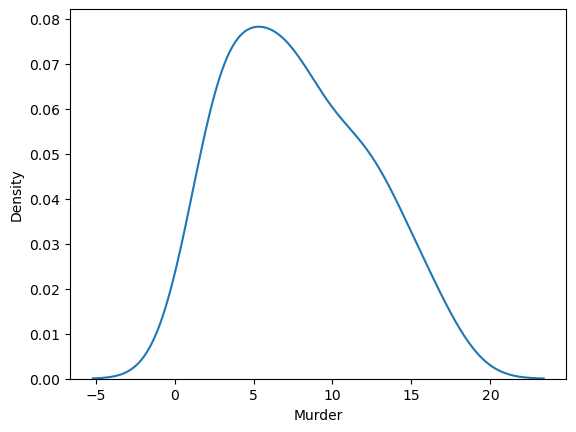

Assault


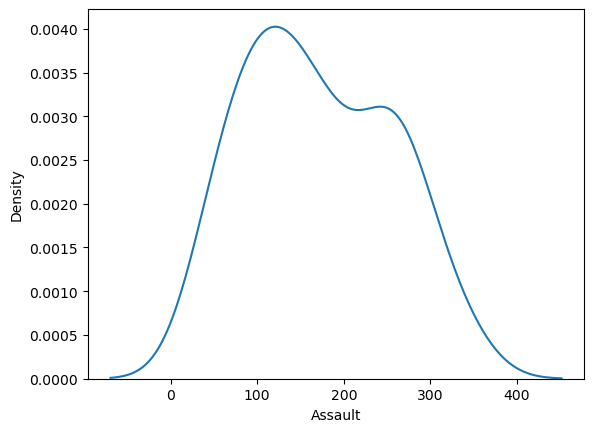

UrbanPop


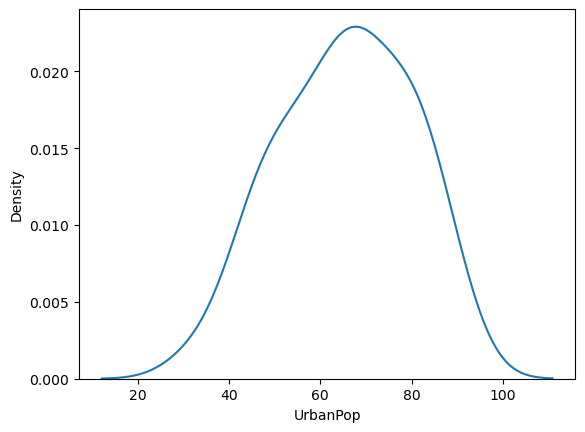

Rape


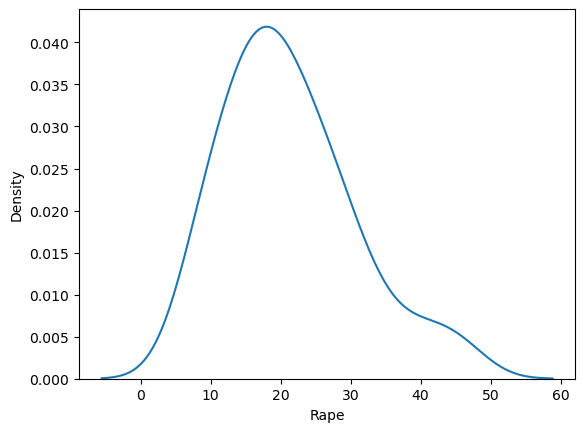

In [10]:
 # Kernel Density for every feature
for n in data1.columns:
    print(n)
    sns.kdeplot(data1[n])
    plt.show()
    

# Treating outliers

<Axes: xlabel='Rape'>

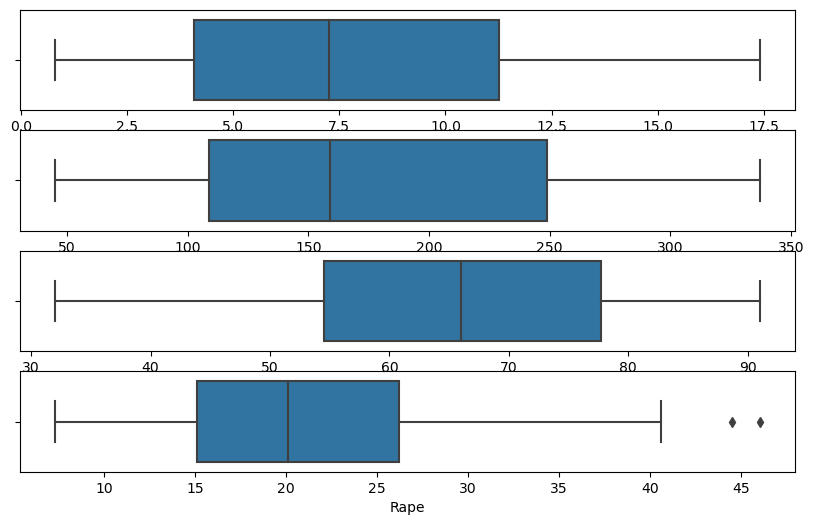

In [11]:
data=data.copy()
fig,axs=plt.subplots(4,1,figsize=(10,6),sharex=False,sharey=False,)
sns.boxplot(x='Murder',data=data,ax=axs[0])
sns.boxplot(x='Assault',data=data,ax=axs[1])
sns.boxplot(x='UrbanPop',data=data,ax=axs[2])
sns.boxplot(x='Rape',data=data,ax=axs[3])

<Axes: >

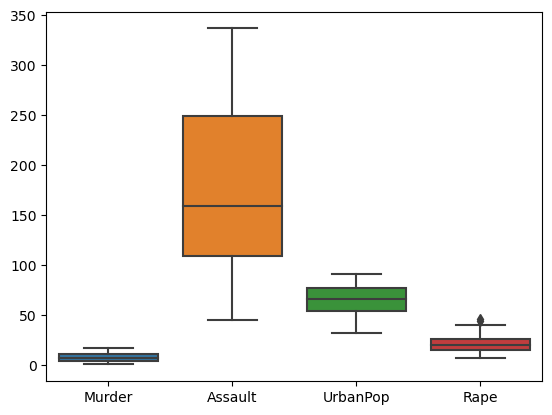

In [12]:
# Boxplot for avery feature in same graph
sns.boxplot(data=data1)

<Axes: >

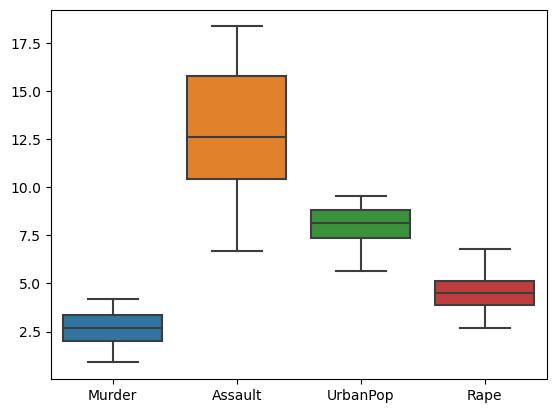

In [13]:
# we use sqrt() to see more clearly despite the outliers
sns.boxplot(data=np.sqrt(data1))

In [14]:
#check the correlation between features
data1.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


<Axes: >

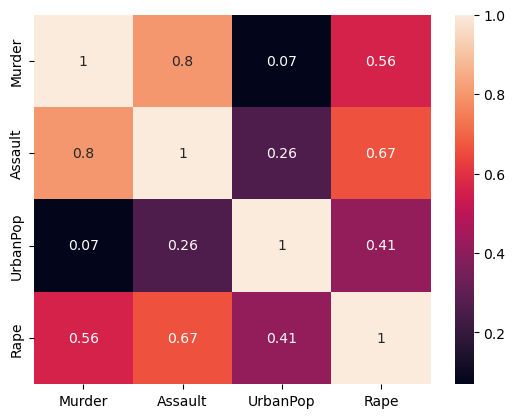

In [15]:
sns.heatmap(data1.corr(),annot=True)

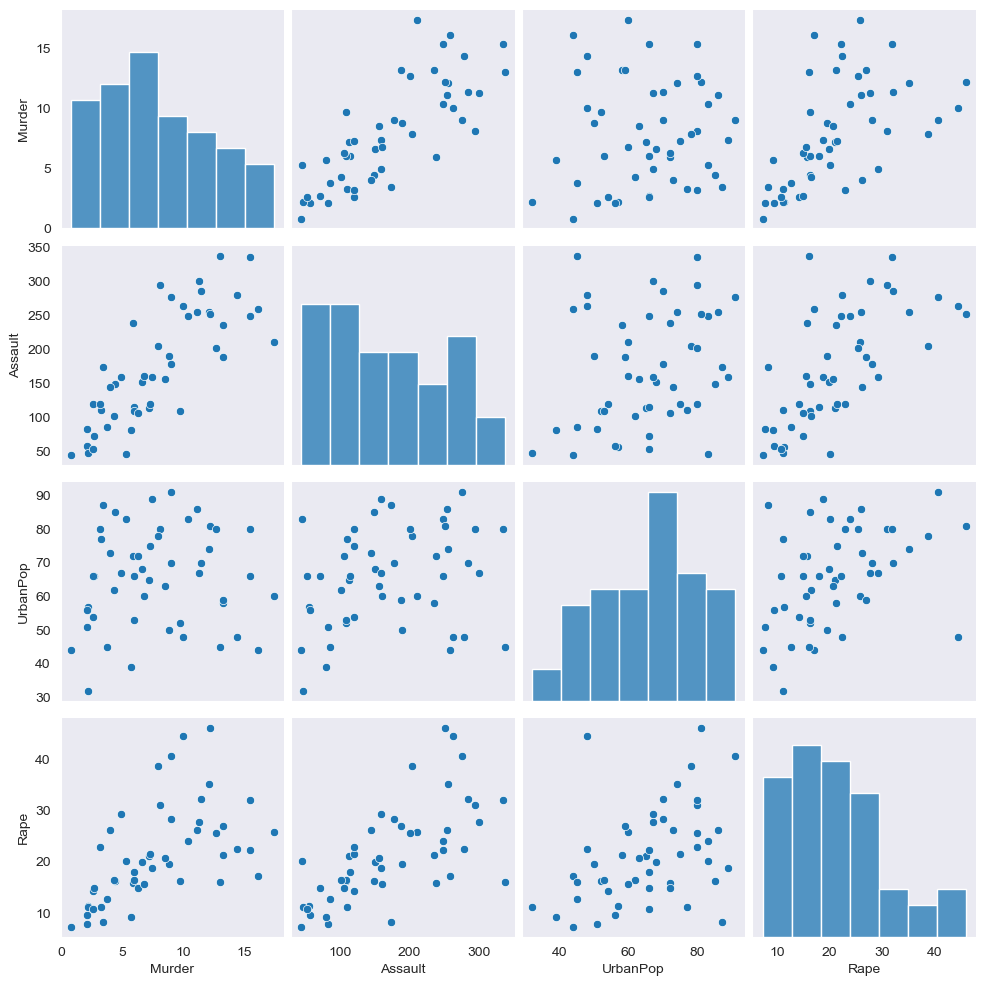

In [16]:
#plot the pairplot for to check the relation between features
sns.set_style(style='dark')
sns.pairplot(data1)

# Hierarchical clustering

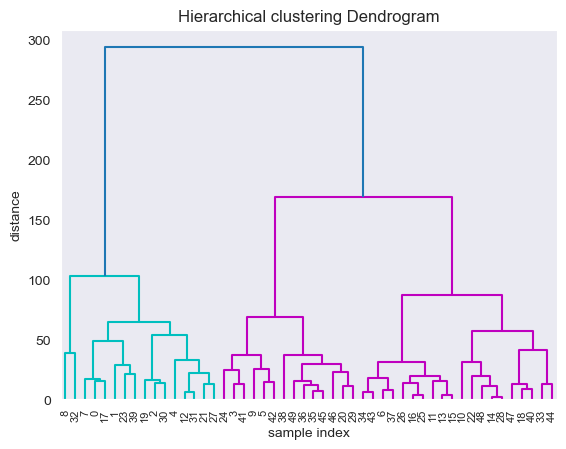

In [17]:
sch.set_link_color_palette(['c','m','y','k'])
dendro=sch.dendrogram(sch.linkage(data1,method='complete'))
plt.title('Hierarchical clustering Dendrogram')
plt.ylabel('distance')
plt.xlabel('sample index')
plt.show()

In [19]:
# Fit the hierarchical clustering model
agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
y_agg = agg.fit_predict(data1)

In [20]:
np.unique(y_agg)

array([0, 1, 2], dtype=int64)

In [21]:
y_agg

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 2], dtype=int64)

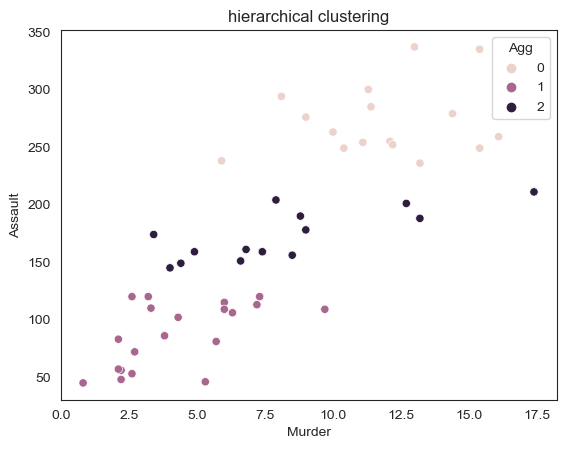

In [22]:
# Add the cluster labels to the original DataFrame
data1['Agg']=y_agg
#plot the cluster
sns.set_style(style='white')
sns.scatterplot(data=data1,x=data1['Murder'],y=data1['Assault'],hue=data1['Agg'])
plt.ylabel('Assault')
plt.xlabel('Murder')
plt.title('hierarchical clustering')
plt.show()

# K-Means clustering

In [23]:
#build Kmeans cluster
kmeans=KMeans(n_clusters=3,random_state=0)
y_kmeans=kmeans.fit(data1)

#print the cluster labels
y_kmeans.labels_

array([2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1])

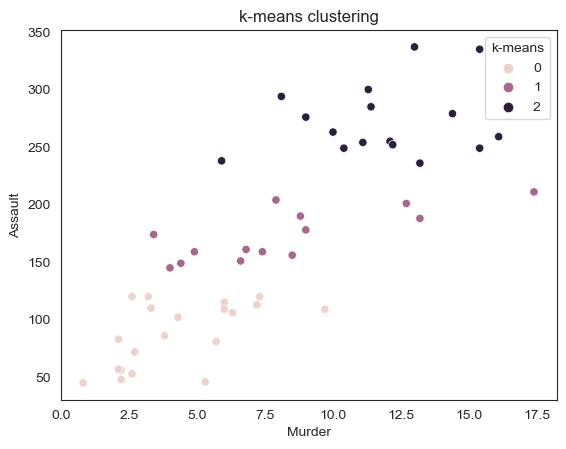

In [24]:
# Add the cluster labels to the original DataFrame
data1['k-means']=y_kmeans.labels_

#plot the cluster
sns.set_style(style='white')
sns.scatterplot(data=data1,x=data1['Murder'],y=data1['Assault'],hue=data1['k-means'])
plt.ylabel('Assault')
plt.xlabel('Murder')
plt.title('k-means clustering')
plt.show()

In [25]:
# Build the DBSCAN cluster
dbscan=DBSCAN(eps=1000,min_samples=5)
db=dbscan.fit(data1)
#print the cluster label
db.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

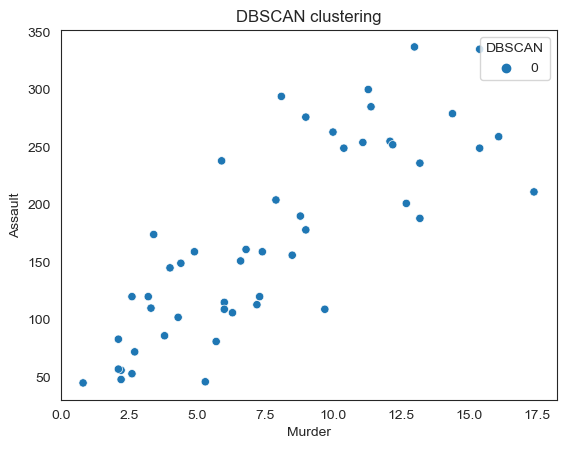

In [26]:
# Add the cluster labels to the original DataFrame
data1['DBSCAN']=db.labels_
#plot the cluster
sns.set_style(style='white')
sns.scatterplot(data=data1,x=data1['Murder'],y=data1['Assault'],hue=data1['DBSCAN'])
plt.ylabel('Assault')
plt.xlabel('Murder')
plt.title('DBSCAN clustering')
plt.show()

In [27]:
data1.head()

,Murder,Assault,UrbanPop,Rape,Agg,k-means,DBSCAN
States,,,,,,,
Alabama,13.2,236,58,21.2,0,2,0
Alaska,10.0,263,48,44.5,0,2,0
Arizona,8.1,294,80,31.0,0,2,0
Arkansas,8.8,190,50,19.5,2,1,0
California,9.0,276,91,40.6,0,2,0


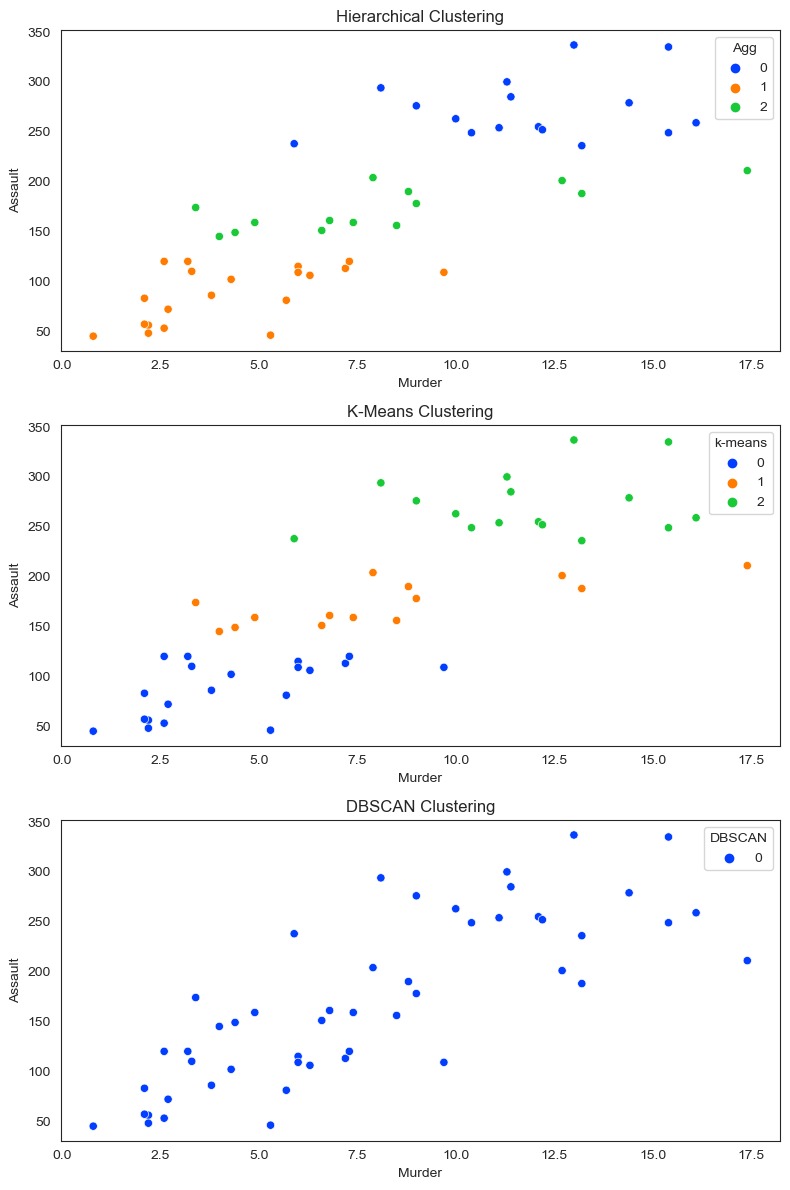

In [28]:
plt.figure(figsize=(8, 12))

#Hierarchical
plt.subplot(3, 1, 1)
sns.scatterplot(data=data1, x="Murder", y="Assault", hue='Agg', palette='bright')
plt.title("Hierarchical Clustering")

#K-means
plt.subplot(3, 1, 2)
sns.scatterplot(data=data1, x="Murder", y="Assault", hue='k-means', palette='bright')
plt.title("K-Means Clustering")

#DBSCAN
plt.subplot(3, 1, 3)
sns.scatterplot(data=data1, x="Murder", y="Assault", hue='DBSCAN', palette='bright')
plt.title("DBSCAN Clustering")

plt.tight_layout()
plt.show()

# There is no much diffrence b/w diffrent cluster but kmeans / DBSCAN is best for this crime dataset